# Can we predict benign or malignancy of tumors?

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("data.csv")
print(data.dtypes)
print(data.head())
print(data.shape)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [38]:
data_set = data.drop(['Unnamed: 32'], axis =1)

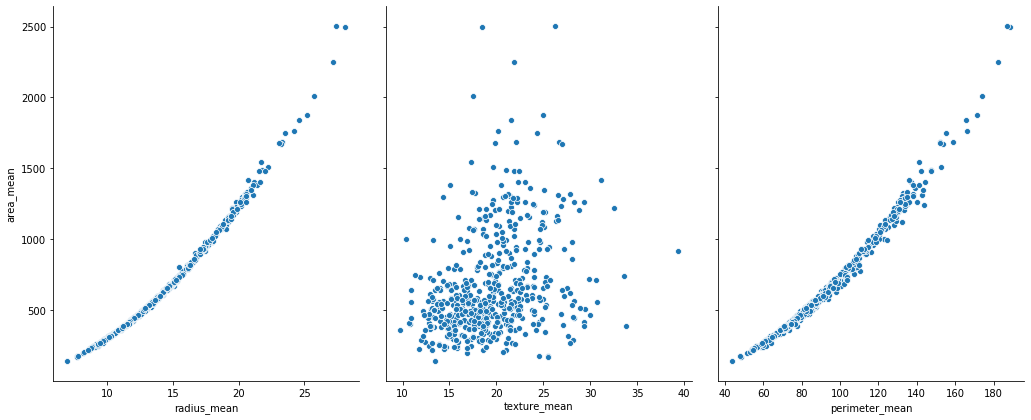

In [39]:
sns.pairplot(data_set, x_vars =['radius_mean','texture_mean','perimeter_mean'], y_vars ='area_mean', height =6, aspect=0.8);

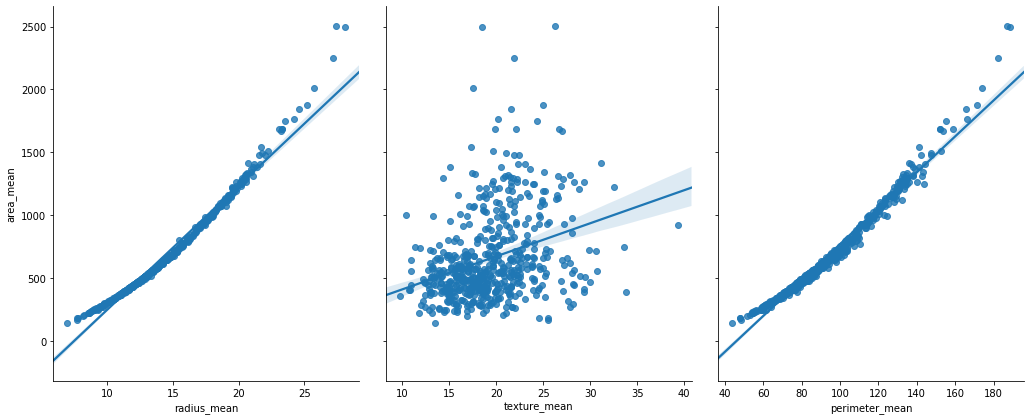

In [40]:
sns.pairplot(data_set, x_vars =['radius_mean','texture_mean','perimeter_mean'], y_vars ='area_mean', height =6, aspect=0.8, kind ='reg')

In [41]:
auto_correlations = data_set.corr()
auto_correlations

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


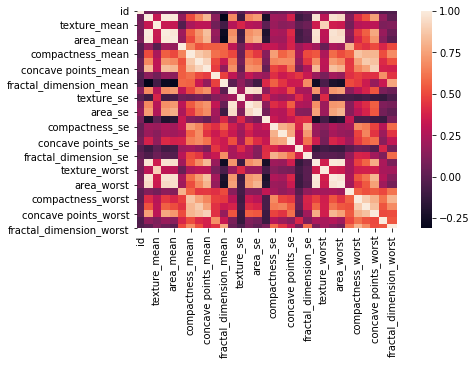

In [16]:
sns.heatmap(auto_correlations)

# 1. Estimate the model coefficients for this data where we will use the `area_mean`  as our single feature to predict `area_worst`

In [23]:
feature_cols = ['area_mean']
X = data[feature_cols]
y = data.area_worst


In [24]:
area_linreg = LinearRegression()
area_linreg.fit(X, y)

print("The y intercept:", area_linreg.intercept_)
print("The single coefficient:", area_linreg.coef_)

The y intercept: -135.7379269068473
The single coefficient: [1.55189795]


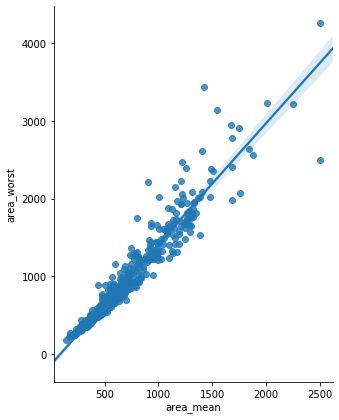

In [25]:
sns.pairplot(data, x_vars=['area_mean'], y_vars = 'area_worst', height=6,aspect =0.8, kind='reg')

# Model for prediction:

In [31]:
#predict for a new area_worst, here where the area_mean is 1000
area_linreg.predict([[1000]])

array([1416.16001959])

# How well does this model fit the data? 

R^2: 0.9200902041043412


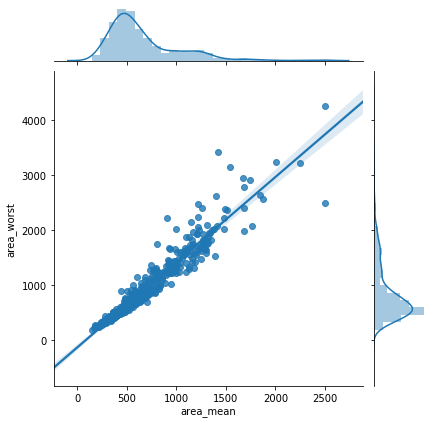

In [32]:
sns.jointplot('area_mean','area_worst', data_set, kind='reg')
print("R^2:", stats.pearsonr(X.values.flatten(), y.values)[0]**2)

# Reconfirm R^2 value

In [33]:
y_pred = area_linreg.predict(X)
metrics.r2_score(y, y_pred)

0.9200902041043411

# Converting categorical target into a number